<a href="https://colab.research.google.com/github/duwain/Project-2/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2 Part 1**

* Author: Duwain Hofmeester

## **First Choice Dataset**

##### **Imports**

In [66]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer


# Instantiate models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# Classification Metrics

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

#### **Load Dataset**

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# Save the filepath and load the data as "df_titanic"
fpath= "/content/drive/MyDrive/Project 2/First choice Dataset/Car_Insurance_Claim.csv"
df = pd.read_csv(fpath)

In [4]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [6]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 10000 rows, and 19 columns.
The rows represent 10000 observations, and the columns represent 18 features and 1 target variable.


### **1. Source of data**
- Kaggle (https://www.kaggle.com/datasets/sagnik1511/car-insurance-data?resource=download}

### **2. Brief description of data**
- We have to determine the outcome of a customer's behaviour based on the different features.

-    ID                                int64  
-    AGE                               object
-    GENDER                            object
-    RACE                              object
-    DRIVING_EXPERIENCE                object
-    EDUCATION                         object
-    INCOME                            object
-    CREDIT_SCORE                      float64
-    VEHICLE_OWNERSHIP                 float64
-    VEHICLE_YEAR                      object
-    MARRIED                           float64
-    CHILDREN                          float64
-    POSTAL_CODE                       int64  
-    ANNUAL_MILEAGE                    float64
-    VEHICLE_TYPE                      object
-    SPEEDING_VIOLATIONS               int64  
-    DUIS                              int64  
-    PAST_ACCIDENTS                    int64  
-    OUTCOME                           float64

### **3. What is the target?**
- OUTCOME

### **4. What does one row represent? (A person? A business? An event? A product?)**
- Each row in the data provides relavant information about the customer.

### **5. Is this a classification or regression problem?**
- This is a classification problem

### **6. How many features does the data have?**
- 19 features of which 1 is the target (OUTCOME)

### **7. How many rows are in the dataset?**
- There are 10000 rows

### **8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

- CREDIT SCORE and ANNUAL MILEAGE feature has missing values
- unnecessary columns can be dropped such as ID

## **Second Choice Dataset**

In [7]:
# Save the filepath and load the data as "df_titanic"
fpath= "/content/drive/MyDrive/Project 2/Second choice Dataset/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(fpath)

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


### **1. Source of data**
- Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset}

### **2. Brief description of data**
- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

 -   id: unique identifier                    int64    
 -   gender: "Male", "Female" or "Other"      object
 -   age:age of the patient                   float64
 -   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension                     int64  
 -   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease           int64  
 -   ever_married: "No" or "Yes"              object
 -   work_type: "Govt_jov", "Never_worked", "Private" or "Self-employed"                              object
 -   Residence_type: "Rural" or "Urban"       object
 -   avg_glucose_level: average glucose level in blood  float64
 -   bmi:body mass index                      float64
 -   smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*                                    object
 -   stroke: 1 if the patient had a stroke or 0 if not                int64

### **3. What is the target?**
- STROKE

### **4. What does one row represent? (A person? A business? An event? A product?)**
- Each row in the data provides relavant information about the patient.

### **5. Is this a classification or regression problem?**
- This is a Classification problem

### **6. How many features does the data have?**
- 12 features of which 1 is the target (STROKE)

### **7. How many rows are in the dataset?**
- There are 5110 rows

### **8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

- Missing values need to be addressed.


# **Part 2**

In [11]:
# Save the filepath and load the data as "df_titanic"
fpath= "/content/drive/MyDrive/Project 2/First choice Dataset/Car_Insurance_Claim.csv"
df_2 = pd.read_csv(fpath)

In [12]:
# Create a copy of the dataset for Modeling
df_ml = df_2.copy()

In [13]:
df_2.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [14]:
# Display the number of rows and columns for the dataframe
df_2.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [15]:
# Display the column names, count of non-null values, and their datatypes
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

## **2. Clean the Data**

### **Remove Unnecessary Columns**

In [16]:
# remove unnecessary columns
df_2.drop(columns=['ID', 'CHILDREN', 'MARRIED'], inplace=True)
df_2.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

### **Remove Unecessary Rows**

In [17]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_2.duplicated().sum()} duplicate rows.')

There are 26 duplicate rows.


In [18]:
# drop all duplicates
df_2.drop_duplicates(inplace = True)

In [19]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_2.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Missing Values**

In [20]:
# Display the total number of missing values
print(f'There are {df_2.isna().sum().sum()} missing values.')

There are 1910 missing values.


In [21]:
# Check for missing values for different features.
df_2.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           956
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
POSTAL_CODE              0
ANNUAL_MILEAGE         954
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [22]:
# Saving list of column names for numeric cols
num_cols = df_2.select_dtypes('number').columns
num_cols

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [23]:
Num_placeholder =-1.0
for i in num_cols:
  df_2[i].fillna(value = Num_placeholder, inplace = True)

In [24]:
# Check for missing values after adding a placeholder.
df_2.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [25]:
obj_col_1= df_2.describe(include = 'object')
for i in obj_col_1:
  print(df_2[i].value_counts())
  print('\n')

26-39    3058
40-64    2931
16-25    1995
65+      1990
Name: AGE, dtype: int64


female    5000
male      4974
Name: GENDER, dtype: int64


majority    8987
minority     987
Name: RACE, dtype: int64


0-9y      3507
10-19y    3296
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64


high school    4149
university     3922
none           1903
Name: EDUCATION, dtype: int64


upper class      4333
middle class     2136
poverty          1795
working class    1710
Name: INCOME, dtype: int64


before 2015    6942
after 2015     3032
Name: VEHICLE_YEAR, dtype: int64


sedan         9497
sports car     477
Name: VEHICLE_TYPE, dtype: int64




- No nconsistencies data identified

## **univariate visuals**

###### **Explore Univariate Categorical Function**

In [26]:
#from week 4 lecture
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### **Explore Univariate Numerical Function**

In [27]:
#from week 4 lecture
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [28]:
# Saving list of column names for categorical cols
cat_cols = df_2.select_dtypes('object').columns
cat_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

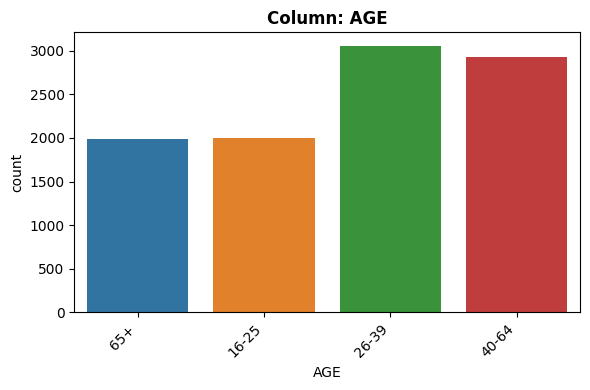

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '26-39' occurs 3058 times (30.66%)
- Not constant or quasi-constant.


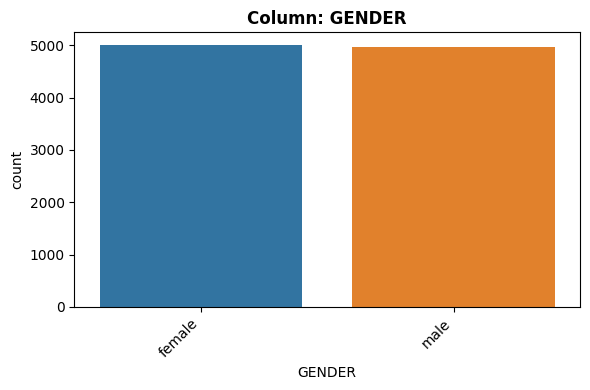

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'female' occurs 5000 times (50.13%)
- Not constant or quasi-constant.


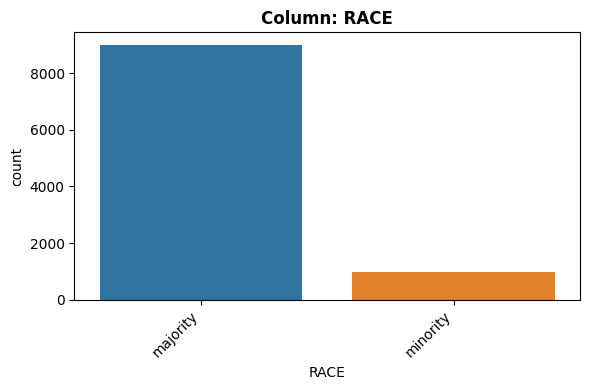

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'majority' occurs 8987 times (90.1%)
- Not constant or quasi-constant.


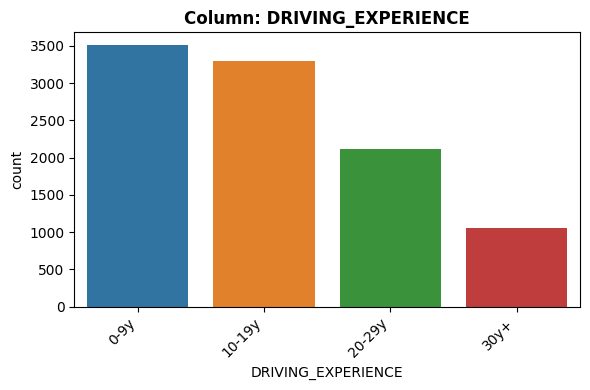

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '0-9y' occurs 3507 times (35.16%)
- Not constant or quasi-constant.


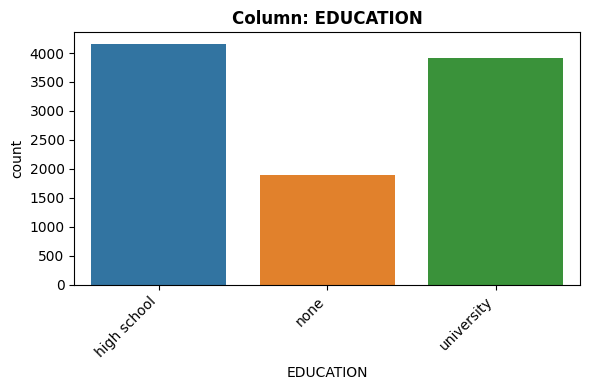

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'high school' occurs 4149 times (41.6%)
- Not constant or quasi-constant.


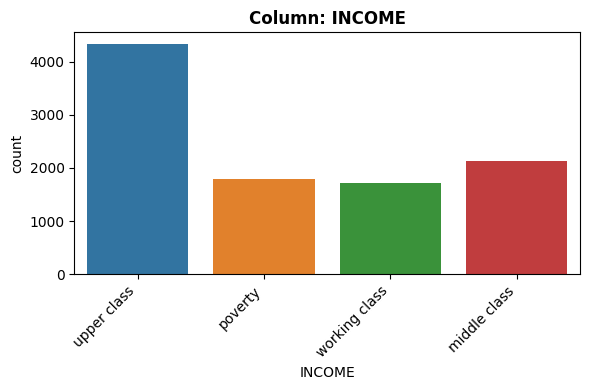

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'upper class' occurs 4333 times (43.44%)
- Not constant or quasi-constant.


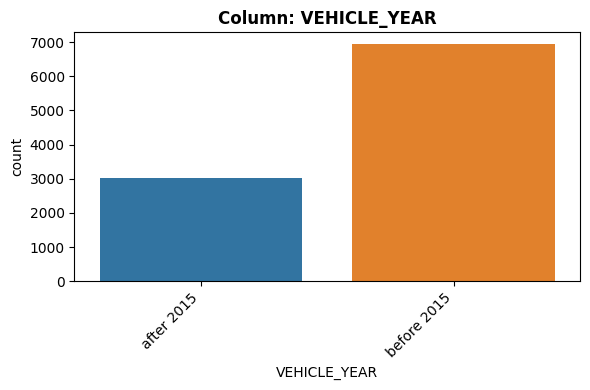

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'before 2015' occurs 6942 times (69.6%)
- Not constant or quasi-constant.


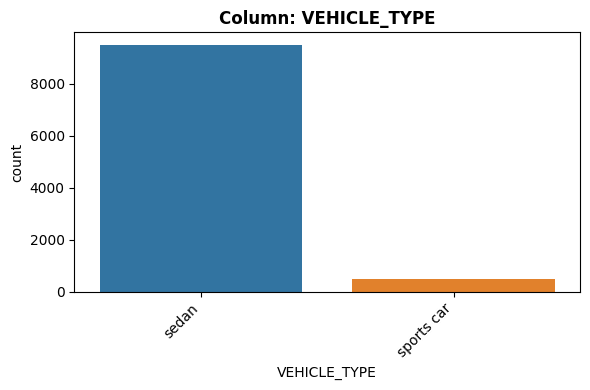

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'sedan' occurs 9497 times (95.22%)
- Not constant or quasi-constant.


In [29]:
for i in cat_cols:
  explore_categorical(df_2, i);

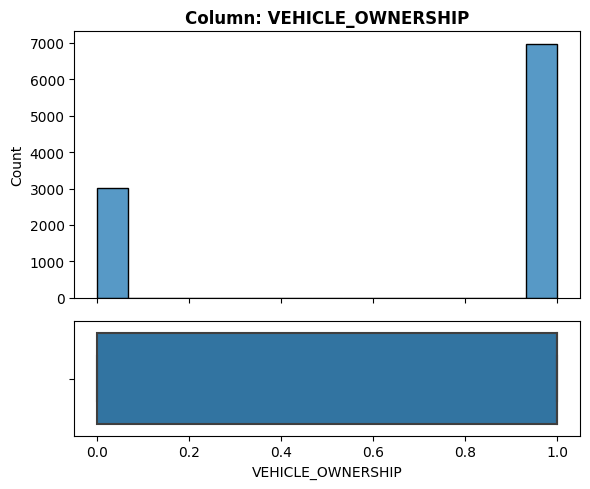

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1.0' occurs 6961 times (69.79%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: VEHICLE_OWNERSHIP'}, xlabel='VEHICLE_OWNERSHIP', ylabel='Count'>,
        <Axes: xlabel='VEHICLE_OWNERSHIP'>], dtype=object))

In [30]:
feature= 'VEHICLE_OWNERSHIP'
explore_numeric(df_2, feature)

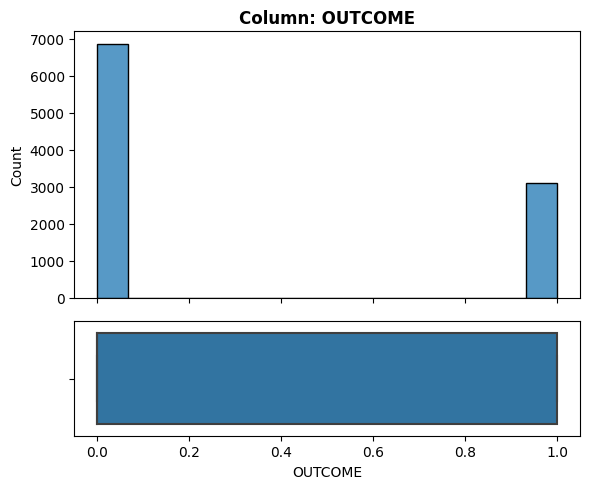

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0.0' occurs 6860 times (68.78%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: OUTCOME'}, xlabel='OUTCOME', ylabel='Count'>,
        <Axes: xlabel='OUTCOME'>], dtype=object))

In [31]:
feature= 'OUTCOME'
explore_numeric(df_2, feature)

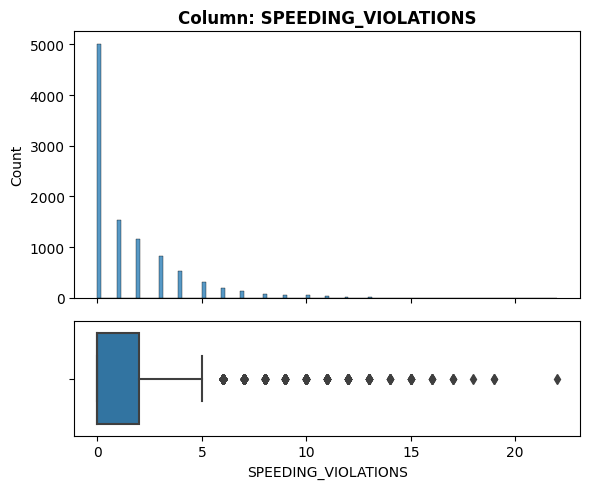

- NaN's Found: 0 (0.0%)
- Unique Values: 21
- Most common value: '0' occurs 5005 times (50.18%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: SPEEDING_VIOLATIONS'}, xlabel='SPEEDING_VIOLATIONS', ylabel='Count'>,
        <Axes: xlabel='SPEEDING_VIOLATIONS'>], dtype=object))

In [32]:
feature= 'SPEEDING_VIOLATIONS'
explore_numeric(df_2, feature)

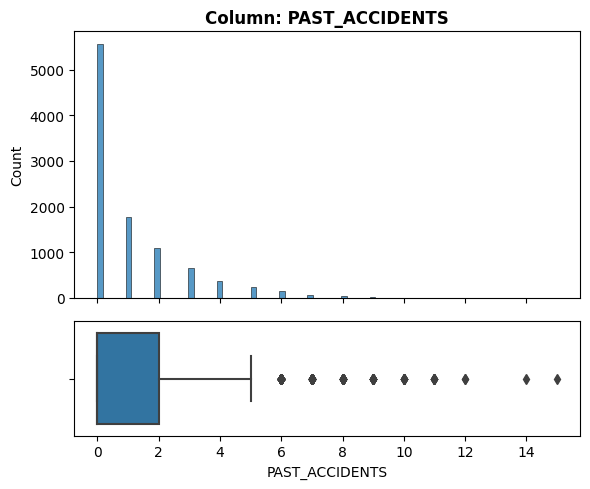

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: '0' occurs 5560 times (55.74%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: PAST_ACCIDENTS'}, xlabel='PAST_ACCIDENTS', ylabel='Count'>,
        <Axes: xlabel='PAST_ACCIDENTS'>], dtype=object))

In [33]:
feature= 'PAST_ACCIDENTS'
explore_numeric(df_2, feature)


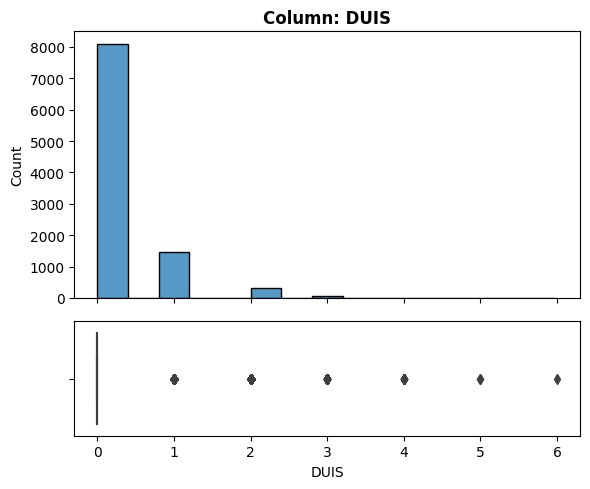

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: '0' occurs 8092 times (81.13%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: DUIS'}, xlabel='DUIS', ylabel='Count'>,
        <Axes: xlabel='DUIS'>], dtype=object))

In [34]:
feature= 'DUIS'
explore_numeric(df_2, feature)

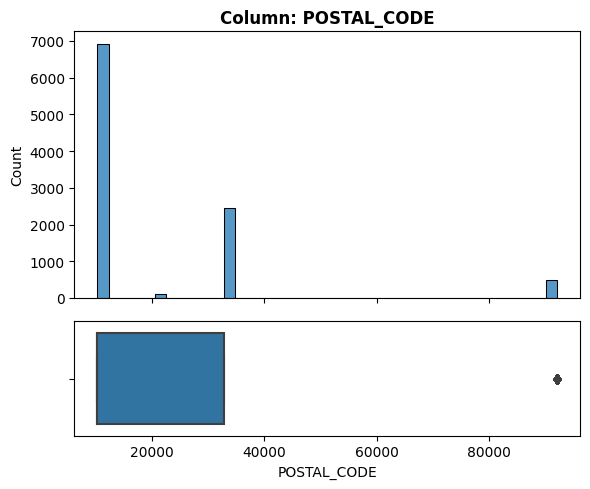

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '10238' occurs 6916 times (69.34%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: POSTAL_CODE'}, xlabel='POSTAL_CODE', ylabel='Count'>,
        <Axes: xlabel='POSTAL_CODE'>], dtype=object))

In [35]:
feature= 'POSTAL_CODE'
explore_numeric(df_2, feature)

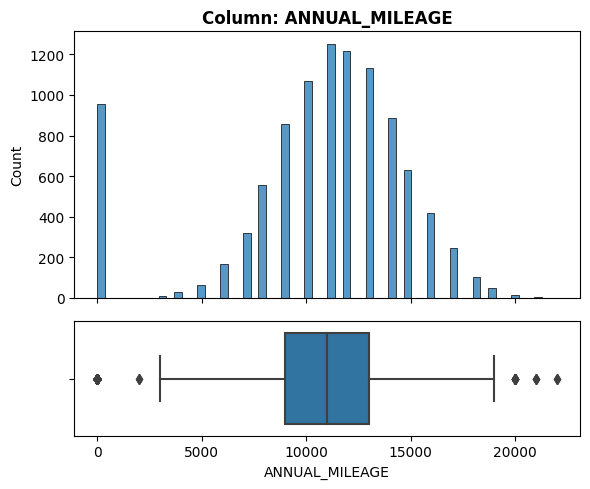

- NaN's Found: 0 (0.0%)
- Unique Values: 22
- Most common value: '11000.0' occurs 1251 times (12.54%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: ANNUAL_MILEAGE'}, xlabel='ANNUAL_MILEAGE', ylabel='Count'>,
        <Axes: xlabel='ANNUAL_MILEAGE'>], dtype=object))

In [36]:
feature= 'ANNUAL_MILEAGE'
explore_numeric(df_2, feature)

# **Part 3**

In [37]:
# Find correlations
corr= df_2.corr()

<ipython-input-37-923a53f1e3c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df_2.corr()


<Axes: >

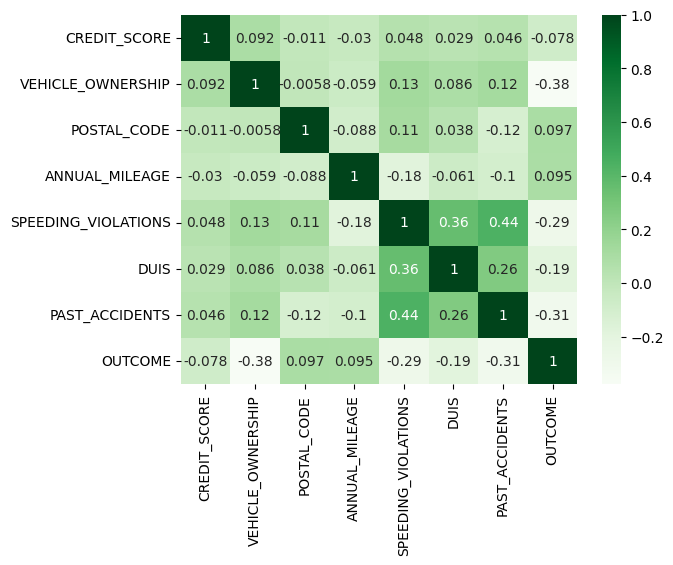

In [38]:
# Make a heatmap using the correlations from above
sns.heatmap(corr, cmap = 'Greens', annot = True)

- There is a strong corelation between Credit_score and Vehicle_Ownership.
- There is a strong corelation between Outcome and Postal_code.
- There is a strong corelation between Outcome and Annual_mileage.
- There is a strong corelation between Duis and Vehicle_Ownership.

## **Multiple Variables**

###### **Explore Multivariate numeric Function**

In [39]:
# from lecture slides
def plot_numeric_vs_target(df, x, y='OUTCOME', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

###### **Explore Multivariate Categorical Function**

In [40]:
#from week 4 lecture
def plot_categorical_vs_target(df, x, y='OUTCOME',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

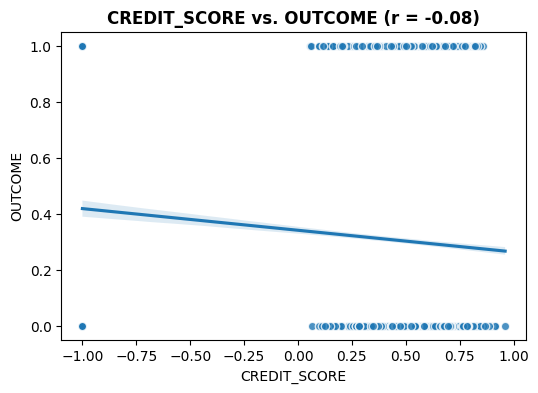

In [41]:
feature = 'CREDIT_SCORE'
plot_numeric_vs_target(df_2, feature);

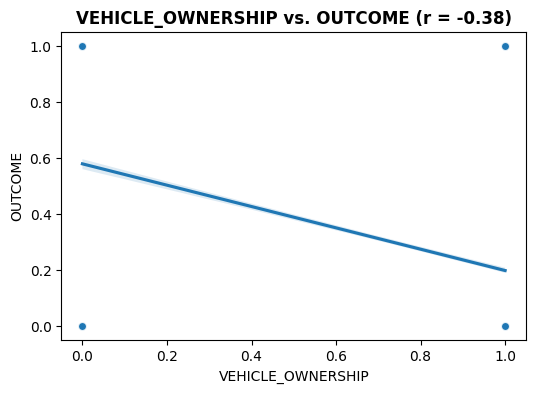

In [42]:
feature = 'VEHICLE_OWNERSHIP'
plot_numeric_vs_target(df_2, feature);

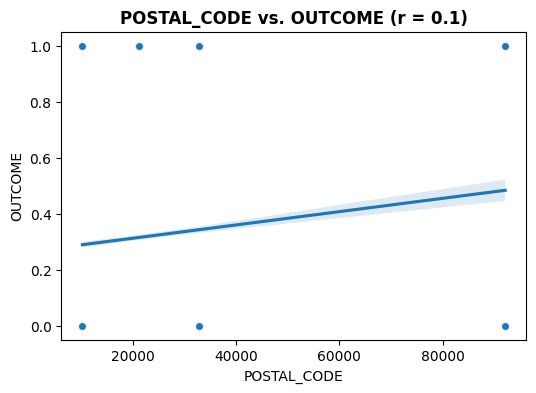

In [43]:
feature = 'POSTAL_CODE'
plot_numeric_vs_target(df_2, feature);

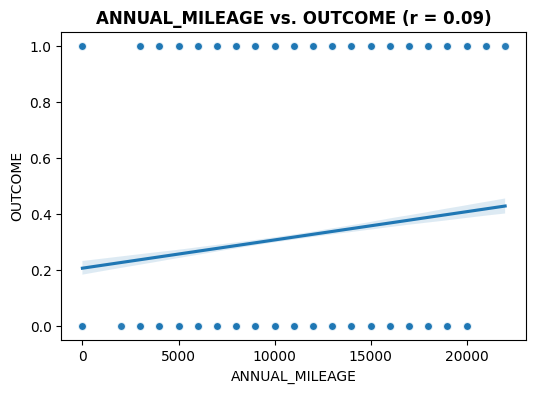

In [44]:
feature = 'ANNUAL_MILEAGE'
plot_numeric_vs_target(df_2, feature);

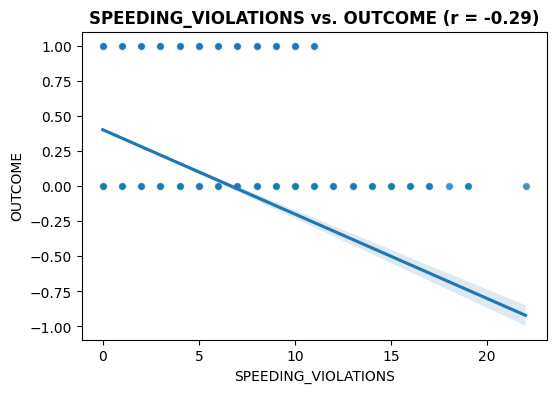

In [45]:
feature = 'SPEEDING_VIOLATIONS'
plot_numeric_vs_target(df_2, feature);

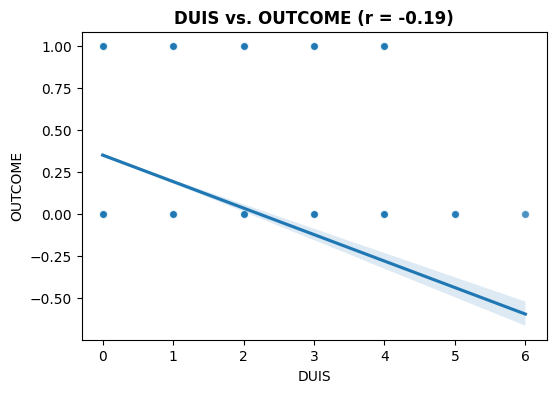

In [46]:
feature = 'DUIS'
plot_numeric_vs_target(df_2, feature);

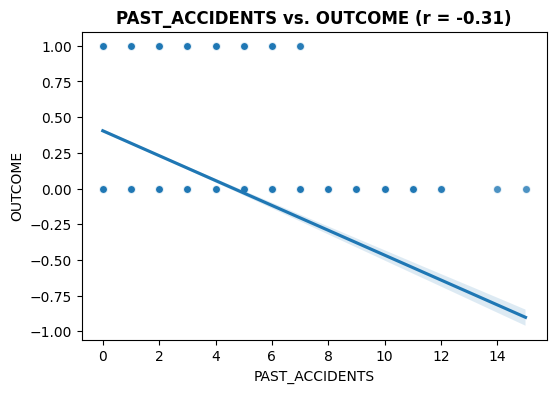

In [47]:
feature ='PAST_ACCIDENTS'
plot_numeric_vs_target(df_2, feature);

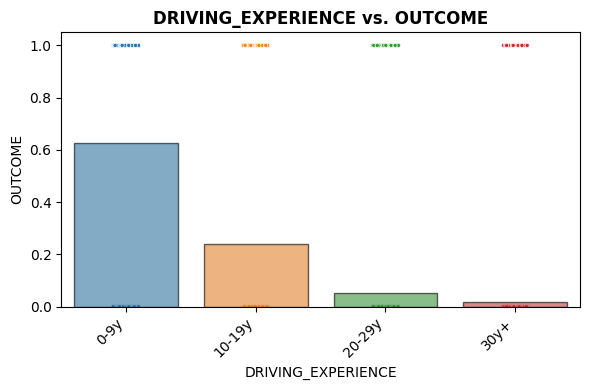

In [48]:
feature = 'DRIVING_EXPERIENCE'
plot_categorical_vs_target(df_2, feature);

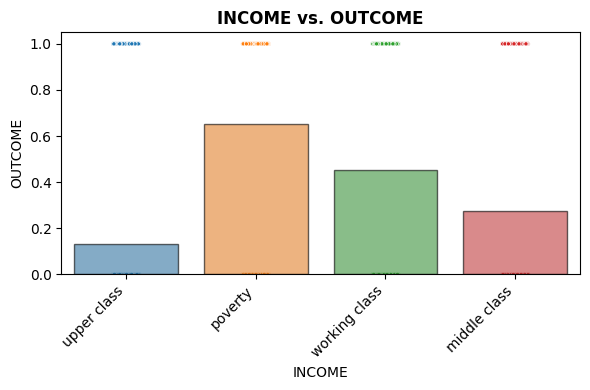

In [49]:
feature = 'INCOME'
plot_categorical_vs_target(df_2, feature);

Text(0.5, 1.0, 'OUTCOME BASED GENDER and DRIVING_EXPERIENCE')

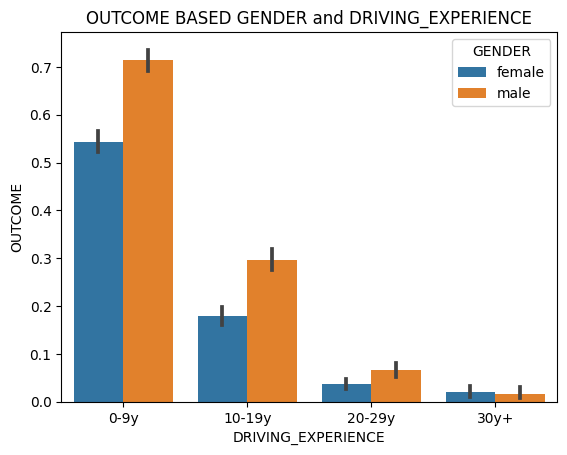

In [50]:
# Create a barplot of smoker vs charges, colored by sex
c = df_2.groupby(['DRIVING_EXPERIENCE','GENDER'])[['OUTCOME']].mean()
c
ax = sns.barplot(data =df_2,
                 x = 'DRIVING_EXPERIENCE',
                 y= 'OUTCOME',
                hue='GENDER')

ax.set_title('OUTCOME BASED GENDER and DRIVING_EXPERIENCE')

### **Analysis**

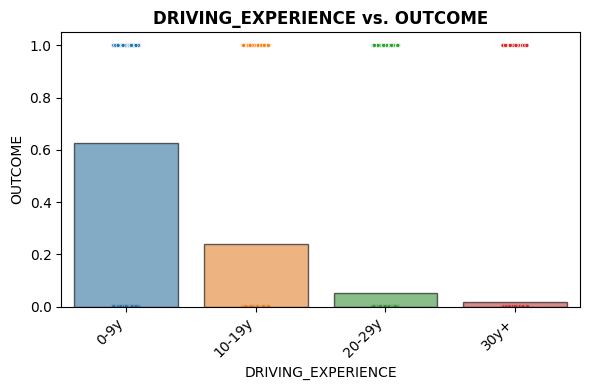

In [51]:
feature = 'DRIVING_EXPERIENCE'
plot_categorical_vs_target(df_2, feature);

- We can see from the graph above that the more driving experienc the customer has, less likely it will be for them to process a claim.

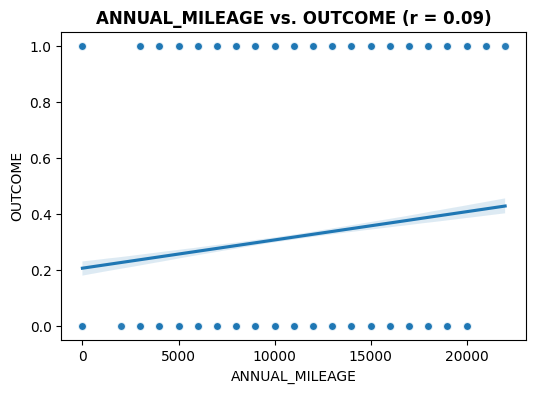

In [52]:
feature = 'ANNUAL_MILEAGE'
plot_numeric_vs_target(df_2, feature);

- In the graph above we can see that the more annual mileage a customer has on his/her vehiche the more likely they will be to process a claim/loan.

## **Modeling**

In [53]:
df_ml.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [55]:
## Display the number of duplicate rows in the dataset
print(f'There are {df_ml.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [57]:
## Display the total number of missing values
print(f'There are {df_ml.isna().sum()} missing values.')

There are ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64 missing values.


In [58]:
#checking for inconsistent values
obj_col_1= df_2.describe(include = 'object')
for i in obj_col_1:
  print(df_2[i].value_counts())
  print('\n')

26-39    3058
40-64    2931
16-25    1995
65+      1990
Name: AGE, dtype: int64


female    5000
male      4974
Name: GENDER, dtype: int64


majority    8987
minority     987
Name: RACE, dtype: int64


0-9y      3507
10-19y    3296
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64


high school    4149
university     3922
none           1903
Name: EDUCATION, dtype: int64


upper class      4333
middle class     2136
poverty          1795
working class    1710
Name: INCOME, dtype: int64


before 2015    6942
after 2015     3032
Name: VEHICLE_YEAR, dtype: int64


sedan         9497
sports car     477
Name: VEHICLE_TYPE, dtype: int64




## **Data Split**

In [59]:
y = df_ml['OUTCOME']
x= df_ml.drop(columns =['OUTCOME'])
x.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1


In [62]:
## Split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [63]:
## Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0.0    0.685867
1.0    0.314133
Name: OUTCOME, dtype: float64

In [64]:
## Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

0.0    0.6892
1.0    0.3108
Name: OUTCOME, dtype: float64

#### **Categorical and Numeric Transformation**

In [67]:
# We will use a mean imputer to impute missing values for the numeric columns
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [68]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')

# Creating a pipline for handling categorical data
impute_categorical = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_categorical,encoder)

# Tuple
cat_tuple = (cat_pipe,cat_selector)

In [69]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       cat_tuple)

In [70]:
#preprocessor.fit(X_train)
y_prep= preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **Create Models**

In [71]:
#create Random Forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [72]:
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c15cdb04bb0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c15c7a471c0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [73]:
## model's predictions on the train dataset
rf_train_preds = rf_pipe.predict(X_train)
## The model's predictions on the test dataset
rf_test_preds = rf_pipe.predict(X_test)

In [77]:
## print the classification reports
#labels = ['loan','no loan']
print('Train Report')
print(classification_report(y_train, rf_train_preds.round()))

print('Test Report')
print(classification_report(y_test, rf_test_preds.round()))

Train Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Test Report
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1723
         1.0       0.74      0.72      0.73       777

    accuracy                           0.84      2500
   macro avg       0.81      0.80      0.81      2500
weighted avg       0.83      0.84      0.84      2500



In [78]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7c15cdb04bb0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                              

### **Tune the Hyperparameters**

In [79]:
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [80]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, cv=2, n_jobs=-1, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c15cdb04bb0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [81]:
# this function is from code along to evaluate the classification metrics

## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

In [82]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__oob_score': True}

In [83]:
# Define and refit best model
best_rf = gridsearch.best_estimator_

In [86]:
## model's predictions on the train dataset
rf_best_train_preds = best_rf.predict(X_train)
## The model's predictions on the test dataset
rf_best_test_preds = best_rf.predict(X_test)

In [87]:
## print the classification reports
#labels = ['loan','no loan']
print('Train Report')
print(classification_report(y_train, rf_best_train_preds.round()))

print('Test Report')
print(classification_report(y_test, rf_best_test_preds.round()))

Train Report
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5144
         1.0       0.84      0.85      0.85      2356

    accuracy                           0.90      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.90      0.90      0.90      7500

Test Report
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1723
         1.0       0.75      0.75      0.75       777

    accuracy                           0.85      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.85      0.85      0.85      2500



## **Model 2 LogisticRegression**

In [88]:
logreg = LogisticRegression(random_state =42)
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c15cdb04bb0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c15c7a471c0>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [89]:
## model's predictions on the train dataset
logreg_train_preds = logreg_pipe.predict(X_train)
## The model's predictions on the test dataset
logreg_test_preds = logreg_pipe.predict(X_test)

In [90]:
## print the classification reports
labels = ['no loan','loan']
print('Train Report')
print(classification_report(y_train, logreg_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, logreg_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

     no loan       0.88      0.90      0.89      5144
        loan       0.77      0.72      0.75      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.81      0.82      7500
weighted avg       0.84      0.84      0.84      7500

Test Report
              precision    recall  f1-score   support

     no loan       0.87      0.90      0.89      1723
        loan       0.76      0.71      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



In [91]:
# Display the hyperparameters.
logreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7c15cdb04bb0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                              

### **Tune the Hyperparameters**

In [92]:
# Create a dictionary of parameters (Parameters I got from notes)
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [93]:
# Tune hyperparameters with GridSearchCV
logreg_gs = GridSearchCV(logreg_pipe, params)
logreg_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c15cdb04bb0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c15c7a471c0>)])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [94]:
logreg_gs.best_params_

{'logisticregression__C': 0.1}

In [95]:
best_logreg = logreg_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82      5144
         1.0       0.60      0.91      0.72      2356

    accuracy                           0.78      7500
   macro avg       0.77      0.81      0.77      7500
weighted avg       0.84      0.78      0.79      7500



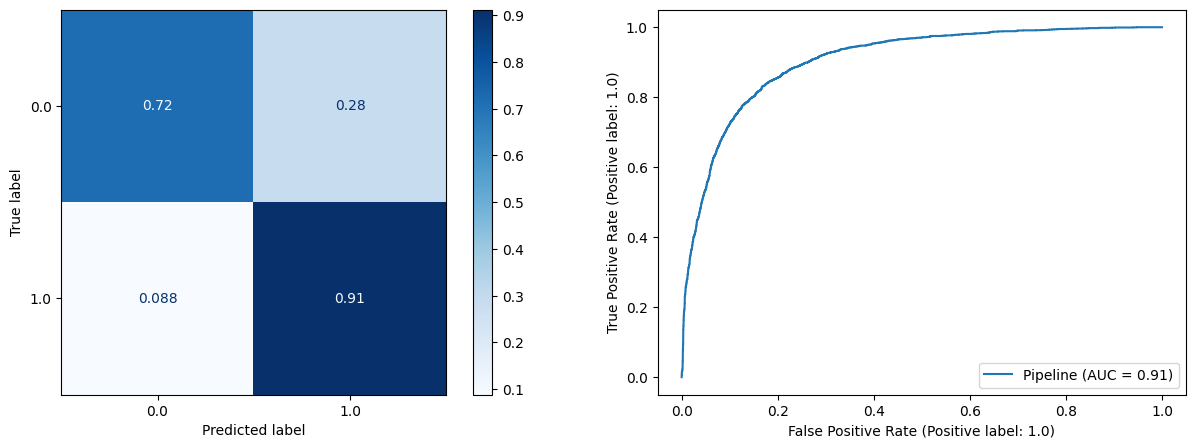

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81      1723
         1.0       0.59      0.91      0.71       777

    accuracy                           0.77      2500
   macro avg       0.77      0.81      0.76      2500
weighted avg       0.83      0.77      0.78      2500



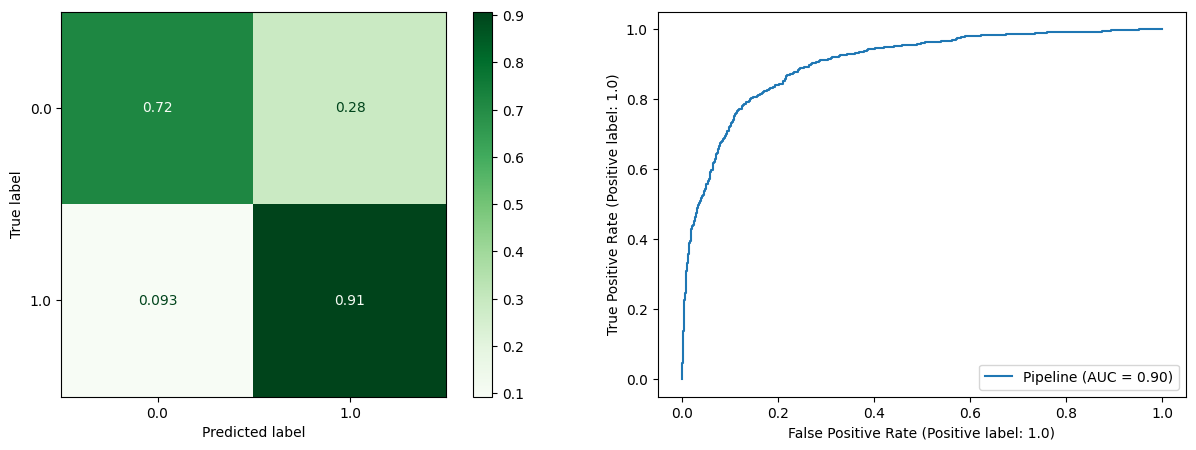

In [96]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(best_logreg, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(best_logreg, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

### Model Performance

- Overall, the best model is the tuned Random Forest Regressor Model.It by far outperformed the Logistic Regression model.

- The model had an accuracy of 85%